## LiB Capacity prediciotn using NASA data

The data is obtained from here : https://data.nasa.gov/dataset/Li-ion-Battery-Aging-Datasets/uj5r-zjdb/about_data

James

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('discharge.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic statistics of the dataframe
print(df.describe())

# Display information about the dataframe
print(df.info())

   Voltage_measured  Current_measured  Temperature_measured  Current_charge  \
0          3.974871         -2.012528             24.389085          1.9982   
1          3.951717         -2.013979             24.544752          1.9982   
2          3.934352         -2.011144             24.731385          1.9982   
3          3.920058         -2.013007             24.909816          1.9982   
4          3.907904         -2.014400             25.105884          1.9982   

   Voltage_charge     Time  Capacity  id_cycle       type  \
0           3.062   35.703  1.856487         1  discharge   
1           3.030   53.781  1.856487         1  discharge   
2           3.011   71.922  1.856487         1  discharge   
3           2.991   90.094  1.856487         1  discharge   
4           2.977  108.281  1.856487         1  discharge   

   ambient_temperature    time Battery  
0                   24  2008.0   B0005  
1                   24  2008.0   B0005  
2                   24  2008.0   B0

In [3]:
df

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,type,ambient_temperature,time,Battery
0,3.974871,-2.012528,24.389085,1.9982,3.062,35.703,1.856487,1,discharge,24,2008.0,B0005
1,3.951717,-2.013979,24.544752,1.9982,3.030,53.781,1.856487,1,discharge,24,2008.0,B0005
2,3.934352,-2.011144,24.731385,1.9982,3.011,71.922,1.856487,1,discharge,24,2008.0,B0005
3,3.920058,-2.013007,24.909816,1.9982,2.991,90.094,1.856487,1,discharge,24,2008.0,B0005
4,3.907904,-2.014400,25.105884,1.9982,2.977,108.281,1.856487,1,discharge,24,2008.0,B0005
...,...,...,...,...,...,...,...,...,...,...,...,...
169761,2.835283,-2.011160,37.396003,1.9986,1.937,2392.437,1.341051,132,discharge,24,2008.0,B0018
169762,2.774711,-2.011370,37.544067,1.9986,1.880,2406.250,1.341051,132,discharge,24,2008.0,B0018
169763,2.690974,-2.010542,37.723665,1.9986,1.806,2420.062,1.341051,132,discharge,24,2008.0,B0018
169764,2.566085,-2.011117,37.925675,1.9986,1.698,2433.890,1.341051,132,discharge,24,2008.0,B0018


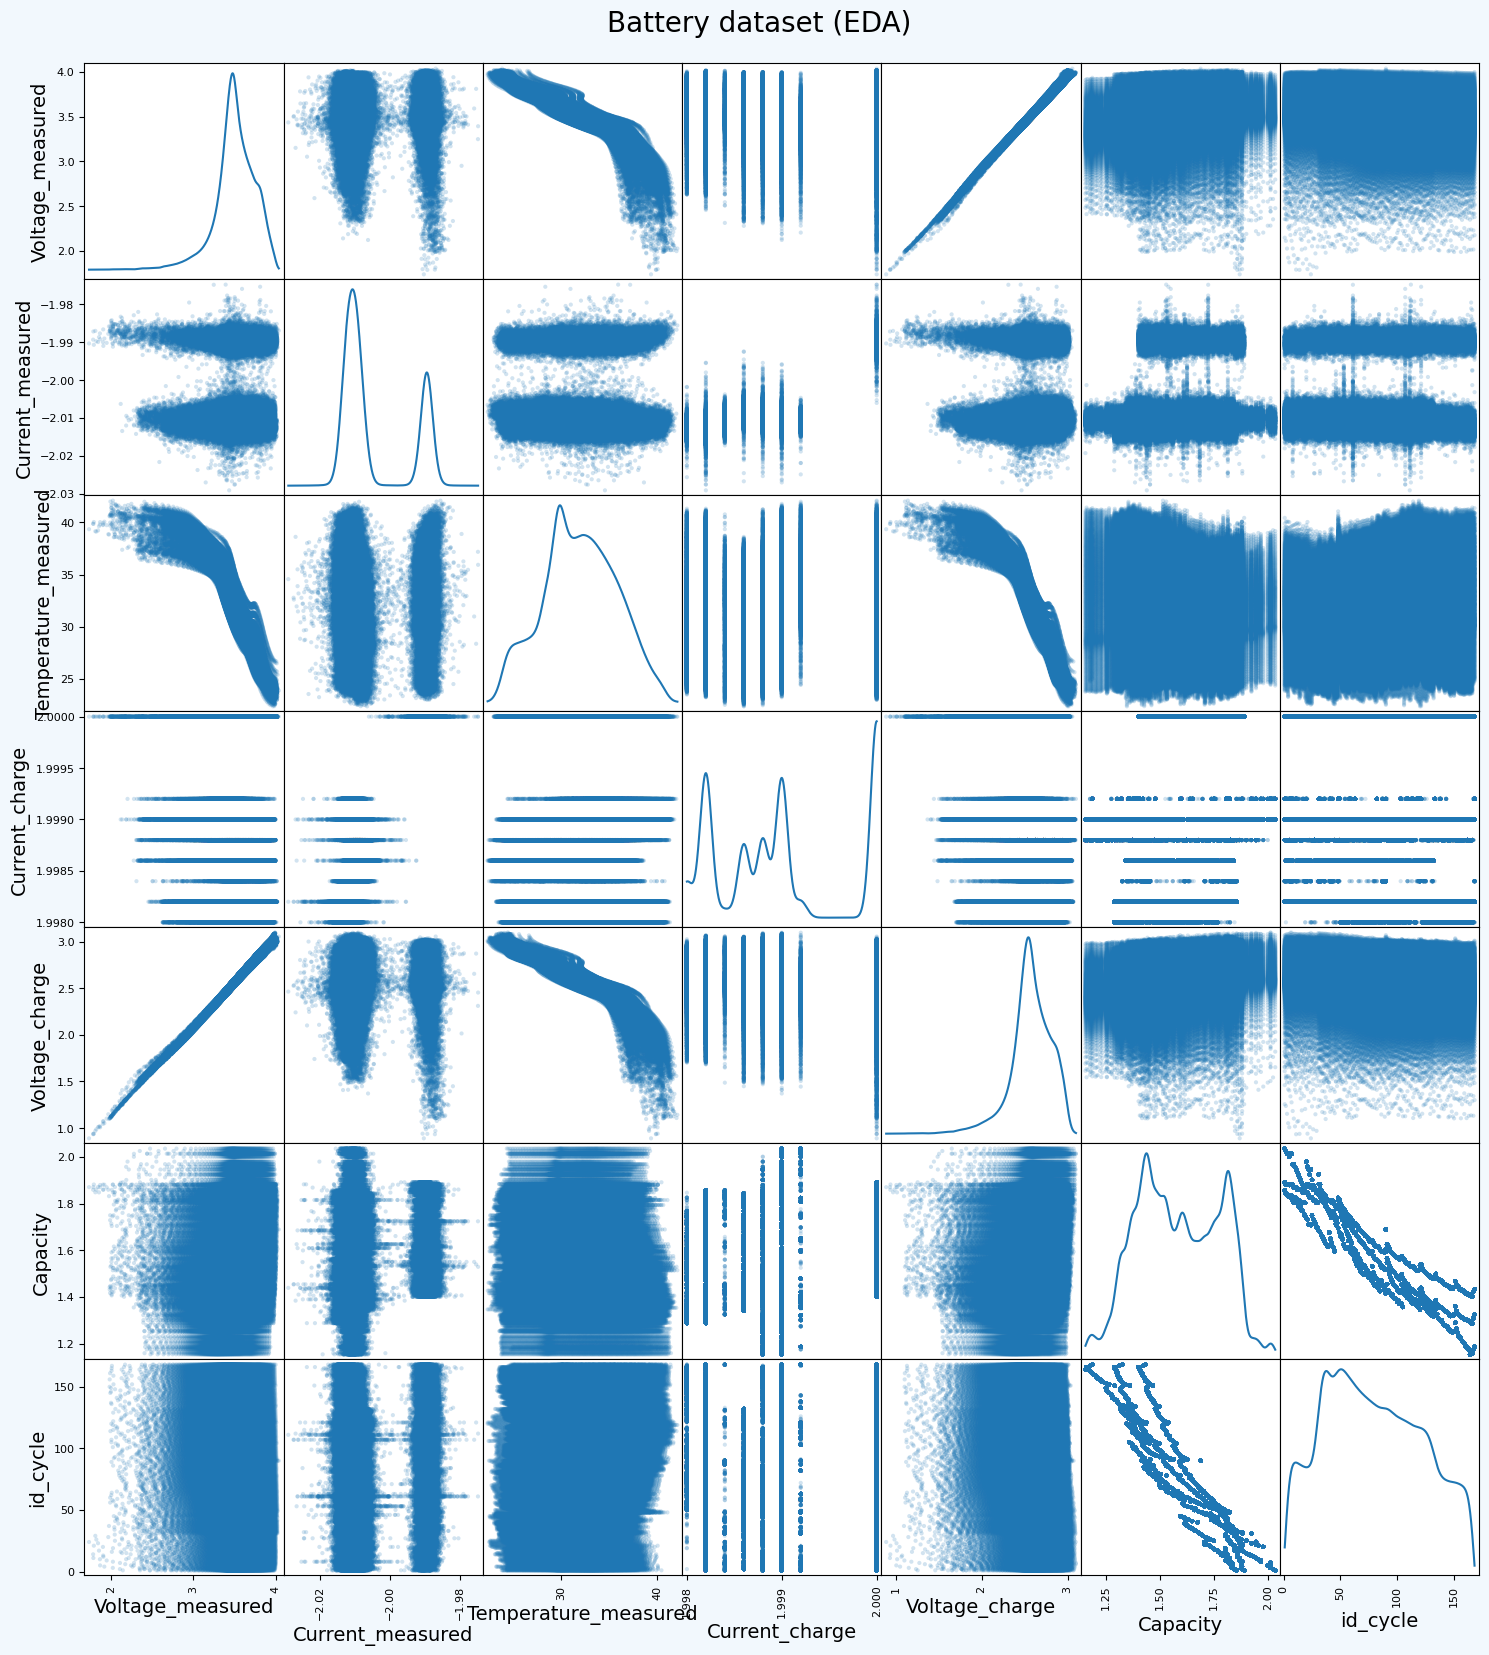

In [4]:
from pandas.plotting import scatter_matrix

# Drop unnecessary columns
df_reduced = df.drop(columns=['Time', 'type', 'ambient_temperature', 'time', 'Battery'])

# Create scatter matrix
scatter_matrix_fig = scatter_matrix(df_reduced, alpha=0.2, figsize=(18, 18), diagonal='kde')

# Customize the appearance
for ax in scatter_matrix_fig.ravel():
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.title.set_size(14)
    ax.grid(False)

plt.suptitle('Battery dataset (EDA)', size=20)
plt.gcf().patch.set_facecolor('#f2f8fd')
plt.subplots_adjust(top=0.95)
plt.show()


In [5]:
df['Battery'].unique()

array(['B0005', 'B0006', 'B0007', 'B0018'], dtype=object)

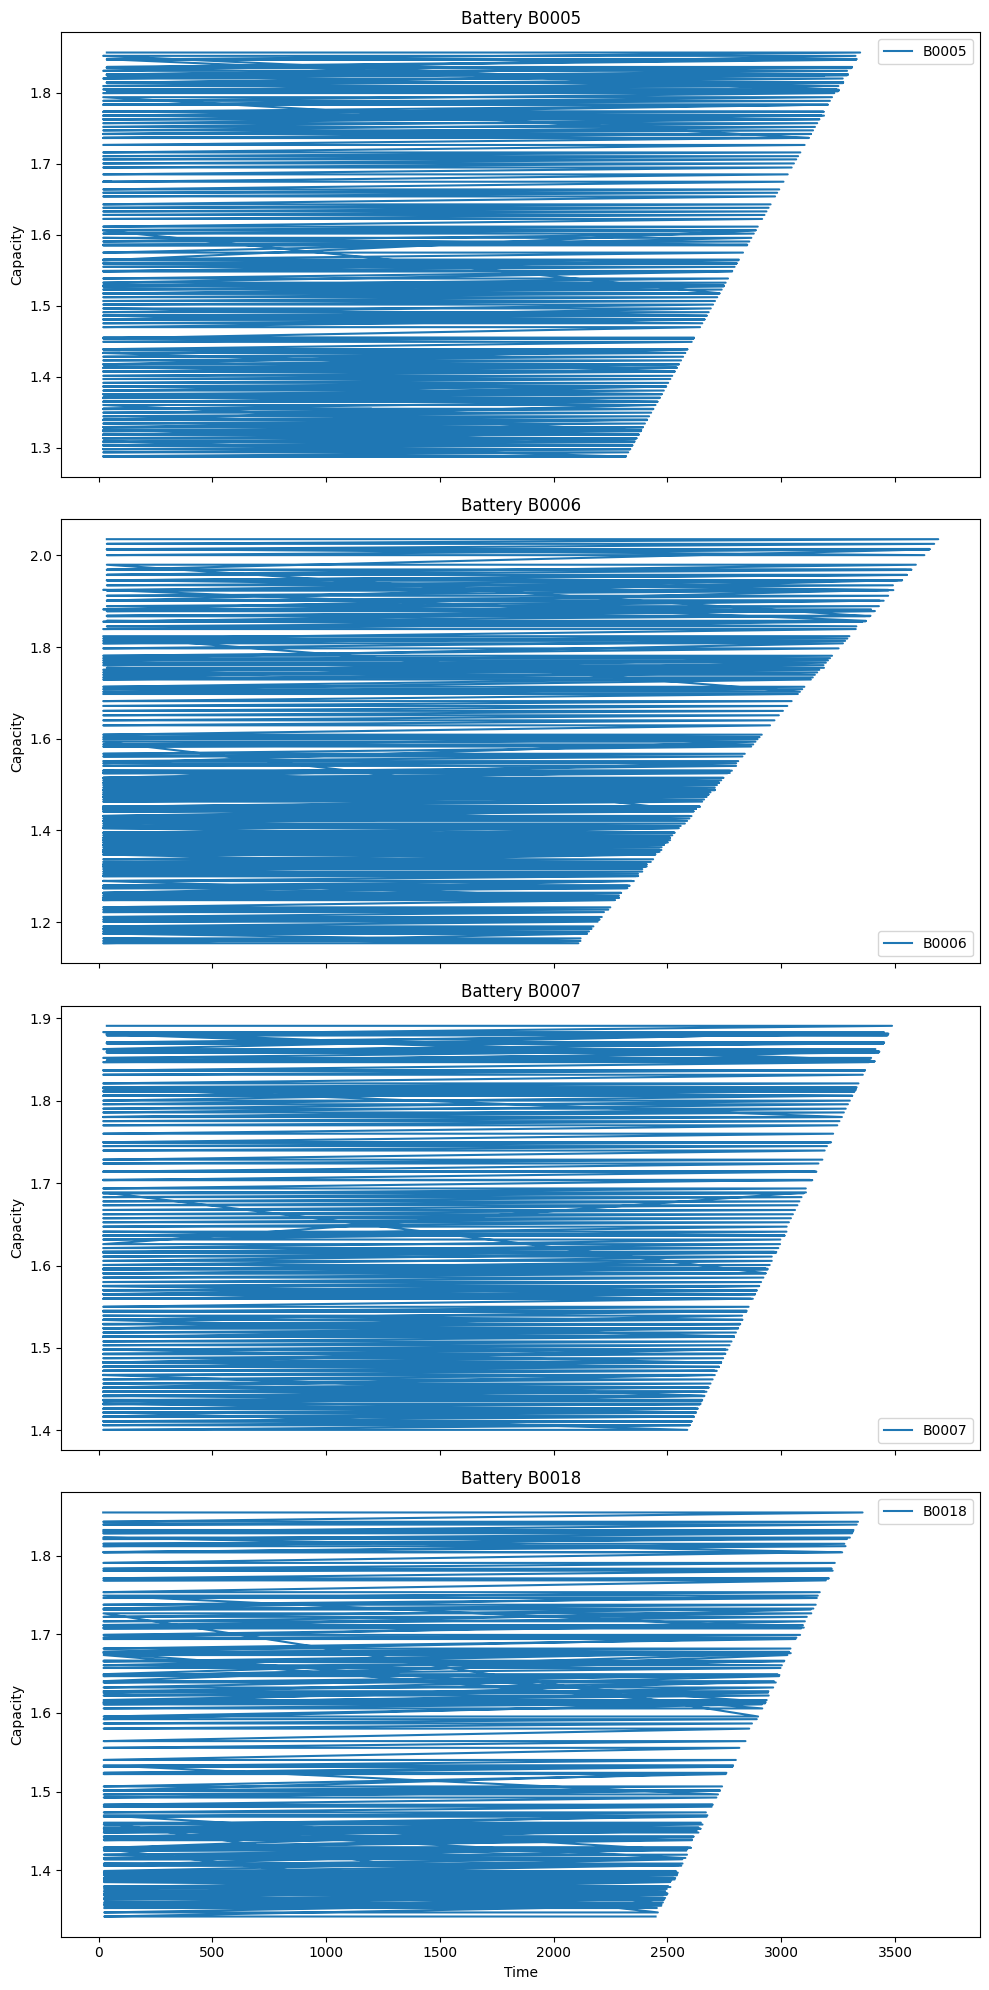

In [6]:


# Get unique batteries
unique_batteries = df['Battery'].unique()

# Create subplots
fig, axes = plt.subplots(len(unique_batteries), 1, figsize=(10, 5 * len(unique_batteries)), sharex=True)

# Add traces for each battery
for i, battery in enumerate(unique_batteries):
    battery_data = df[df['Battery'] == battery]
    axes[i].plot(battery_data['Time'], battery_data['Capacity'], label=battery)
    axes[i].set_title(f'Battery {battery}')
    axes[i].set_ylabel('Capacity')
    axes[i].legend()

# Set common labels
axes[-1].set_xlabel('Time')

# Adjust layout
plt.tight_layout()
plt.show()


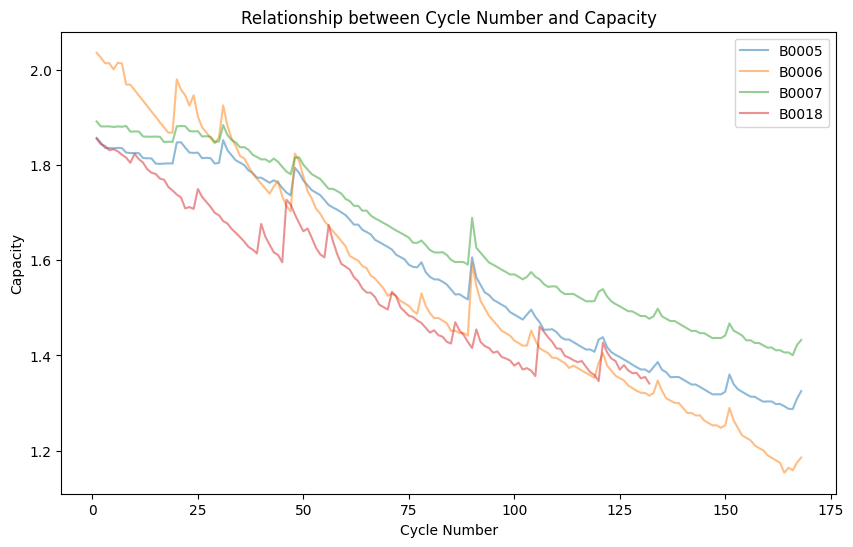

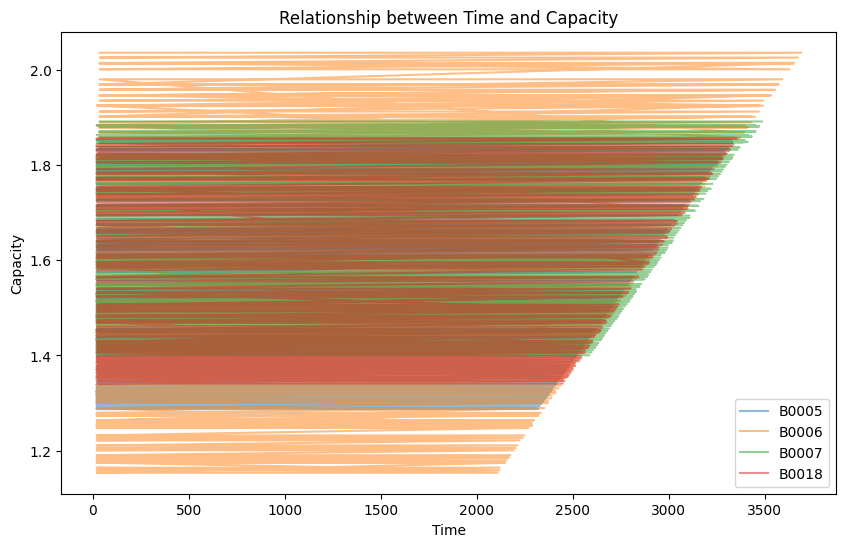

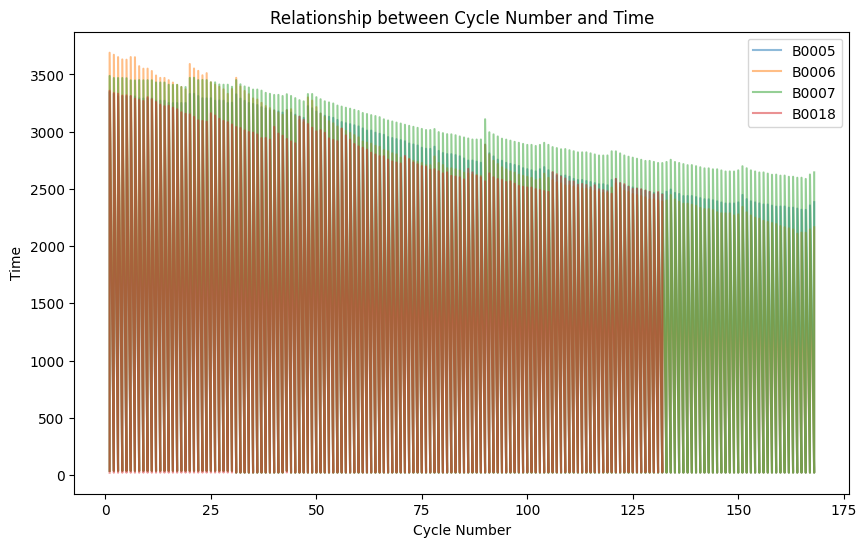

In [7]:
# Plot the relationship between cycle and capacity for each battery
fig, ax = plt.subplots(figsize=(10, 6))

for battery in unique_batteries:
    battery_data = df[df['Battery'] == battery]
    ax.plot(battery_data['id_cycle'], battery_data['Capacity'], label=battery, alpha=0.5)

ax.set_xlabel('Cycle Number')
ax.set_ylabel('Capacity')
ax.set_title('Relationship between Cycle Number and Capacity')
ax.legend()
plt.show()

# Plot the relationship between time and capacity for each battery
fig, ax = plt.subplots(figsize=(10, 6))

for battery in unique_batteries:
    battery_data = df[df['Battery'] == battery]
    ax.plot(battery_data['Time'], battery_data['Capacity'], label=battery,alpha=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Capacity')
ax.set_title('Relationship between Time and Capacity')
ax.legend()
plt.show()

# Plot the relationship between cycle and time for each battery
fig, ax = plt.subplots(figsize=(10, 6))

for battery in unique_batteries:
    battery_data = df[df['Battery'] == battery]
    ax.plot(battery_data['id_cycle'], battery_data['Time'], label=battery,alpha=0.5)

ax.set_xlabel('Cycle Number')
ax.set_ylabel('Time')
ax.set_title('Relationship between Cycle Number and Time')
ax.legend()
plt.show()

So every cycle started, the time goes back to 0 ?



In [8]:
# Split each battery into an individual dataframe
battery_dfs = {battery: df[df['Battery'] == battery].copy() for battery in unique_batteries}

# Reorganize each battery dataframe
for battery, battery_df in battery_dfs.items():
    reorg_t_df = battery_df.groupby(['id_cycle']).max().reset_index()
    reorg_t_df['Cumulated_time'] = reorg_t_df['Time'].cumsum() / 3600  # Convert seconds to hours
    battery_dfs[battery] = reorg_t_df

# Display the first few rows of each reorganized dataframe
for battery, reorg_t_df in battery_dfs.items():
    print(f"Battery {battery} Reorganized DataFrame:")
    print(reorg_t_df.head())
    print("\n")

Battery B0005 Reorganized DataFrame:
   id_cycle  Voltage_measured  Current_measured  Temperature_measured  \
0         1          3.974871         -2.008709             38.904112   
1         2          3.979157         -2.008829             38.934590   
2         3          3.979995         -2.007352             38.743649   
3         4          3.981613         -2.008008             38.672511   
4         5          3.982253         -2.009143             38.558828   

   Current_charge  Voltage_charge      Time  Capacity       type  \
0          1.9984           3.062  3346.937  1.856487  discharge   
1          1.9984           3.056  3328.828  1.846327  discharge   
2          1.9984           3.055  3309.422  1.835349  discharge   
3          1.9984           3.055  3309.719  1.835263  discharge   
4          1.9984           3.056  3307.688  1.834646  discharge   

   ambient_temperature    time Battery  Cumulated_time  
0                   24  2008.0   B0005        0.929705  
1

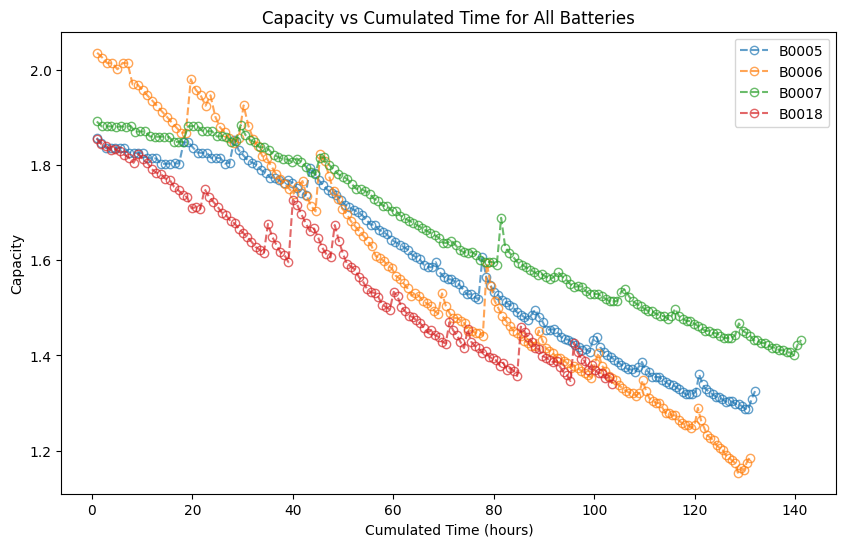

In [9]:
# Plot capacity vs cumulative time for all batteries
fig, ax = plt.subplots(figsize=(10, 6))

for battery, reorg_t_df in battery_dfs.items():
    ax.plot(reorg_t_df['Cumulated_time'], reorg_t_df['Capacity'], label=battery, alpha=0.7, linestyle='--', marker='o', markerfacecolor='none')

ax.set_xlabel('Cumulated Time (hours)')
ax.set_ylabel('Capacity')
ax.set_title('Capacity vs Cumulated Time for All Batteries')
ax.legend()
plt.show()

# Physical Model

Physical model according to [1]. The basic equation is:

$$L = 1 − (1 − L')e^{-f_d}$$

Where \(L\) is the battery lifetime and \(L'\) is the initial battery lifetime. \(f_d\) is a Linearized degradation rate per unit time and per cycle. It can be described as:

$$f_d = f_d(t, \delta, \sigma, T_c)$$

where \(t\) is charging time, \(\delta\) is the cycle depth of discharge, \(\sigma\) is the cycle average state of charge, and \(T_c\) is the cell temperature. The equation for battery capacity could be written as follows:

$$C = C_0e^{f_d}$$

We have empirically found that \(f_d\) approximates to:

$$f_d = \frac{kT_Ci}{t}$$

where \(k = 0.13\), \(i\) is the cycle number, and \(t\) is the charge time for every cycle.

---

[1] Xu, Bolun & Oudalov, Alexandre & Ulbig, Andreas & Andersson, Göran & Kirschen, D.S. (2016). *Modeling of Lithium-Ion Battery Degradation for Cell Life Assessment.* IEEE Transactions on Smart Grid, 99, 1–1. DOI: 10.1109/TSG.2016.2578950.



The following functions implement an exponential-decay model for lithium-ion battery capacity, based on the idea that capacity \(C\) at cycle \(i\) follows:

\[
C(i) = C_0 \cdot e^{-f_d},
\]
where:
- \(C_0\) is the initial capacity at cycle 0.
- \(i\) is the current cycle number.
- \(f_d\) is a linearized degradation rate:  
  \[
  f_d = \frac{k \cdot T_c \cdot i}{t}.
  \]
  Here, \(k\) is an empirical constant, \(T_c\) is cell temperature, and \(t\) is the charge time per cycle.

Initial Capacity: Extracted from the first row of the DataFrame (
C
0
C 
0
​
 ).
Iteration: Each row is treated as a distinct cycle (
𝑖
i), determined by the row index.
Physical Model: For each cycle, physical_model is called to compute the predicted capacity, which is then recorded in a new column 'C. Capacity'.




In [10]:
import numpy as np

def physical_model(C_0, cycle_number, charge_time, temperature, k=0.13):
    """
    Calculate the battery's capacity at a given cycle using an exponential decay model.

    Parameters:
        C_0 (float): Initial battery capacity (e.g., at cycle 0).
        cycle_number (int): The current cycle number.
        charge_time (float): Charge time per cycle.
        temperature (float): Cell temperature.
        k (float): Empirical degradation constant (default is 0.13).

    Returns:
        float: Predicted battery capacity at the specified cycle.
    """
    # Linearized degradation factor
    f_d = (k * temperature * cycle_number) / charge_time
    return C_0 * np.exp(-f_d)


def predict_capacity_physical_model(df, k=0.13):
    """
    Compute a 'corrected' or model-predicted capacity for each row in the DataFrame,
    using the physical_model function. Assumes that the index of dfb corresponds
    to the battery cycle number.

    Parameters:
        df (pd.DataFrame): 
            Must contain columns:
            - 'Capacity': Observed/measured capacity.
            - 'Temperature_measured': The cell temperature.
            - 'Time': Charge time for that cycle.
            The DataFrame index is interpreted as the cycle number (0, 1, 2, ...).

        k (float): Empirical constant for degradation (default is 0.13).

    Returns:
        pd.DataFrame: Same DataFrame with a new column 'C. Capacity' that holds
                      the model-predicted (corrected) capacity.
    """
    # Use the first row's capacity as the initial capacity C_0
    initial_capacity = df['Capacity'].iloc[0]
    Predicted_capacities = []

    for cycle_number, row in df.iterrows():
        charge_time = row['Time']
        temperature = row['Temperature_measured']
        
        # Calculate capacity for this cycle using the physical model
        predicted_capacity = physical_model(
            C_0=initial_capacity,
            cycle_number=cycle_number,
            charge_time=charge_time,
            temperature=temperature,
            k=k
        )
        Predicted_capacities.append(predicted_capacity)

    # Store the predicted capacity in a new column
    df['C. Capacity'] = Predicted_capacities
    return df


Battery B0005 Corrected DataFrame:
   id_cycle  Voltage_measured  Current_measured  Temperature_measured  \
0         1          3.974871         -2.008709             38.904112   
1         2          3.979157         -2.008829             38.934590   
2         3          3.979995         -2.007352             38.743649   
3         4          3.981613         -2.008008             38.672511   
4         5          3.982253         -2.009143             38.558828   

   Current_charge  Voltage_charge      Time  Capacity       type  \
0          1.9984           3.062  3346.937  1.856487  discharge   
1          1.9984           3.056  3328.828  1.846327  discharge   
2          1.9984           3.055  3309.422  1.835349  discharge   
3          1.9984           3.055  3309.719  1.835263  discharge   
4          1.9984           3.056  3307.688  1.834646  discharge   

   ambient_temperature    time Battery  Cumulated_time  C. Capacity  
0                   24  2008.0   B0005        0

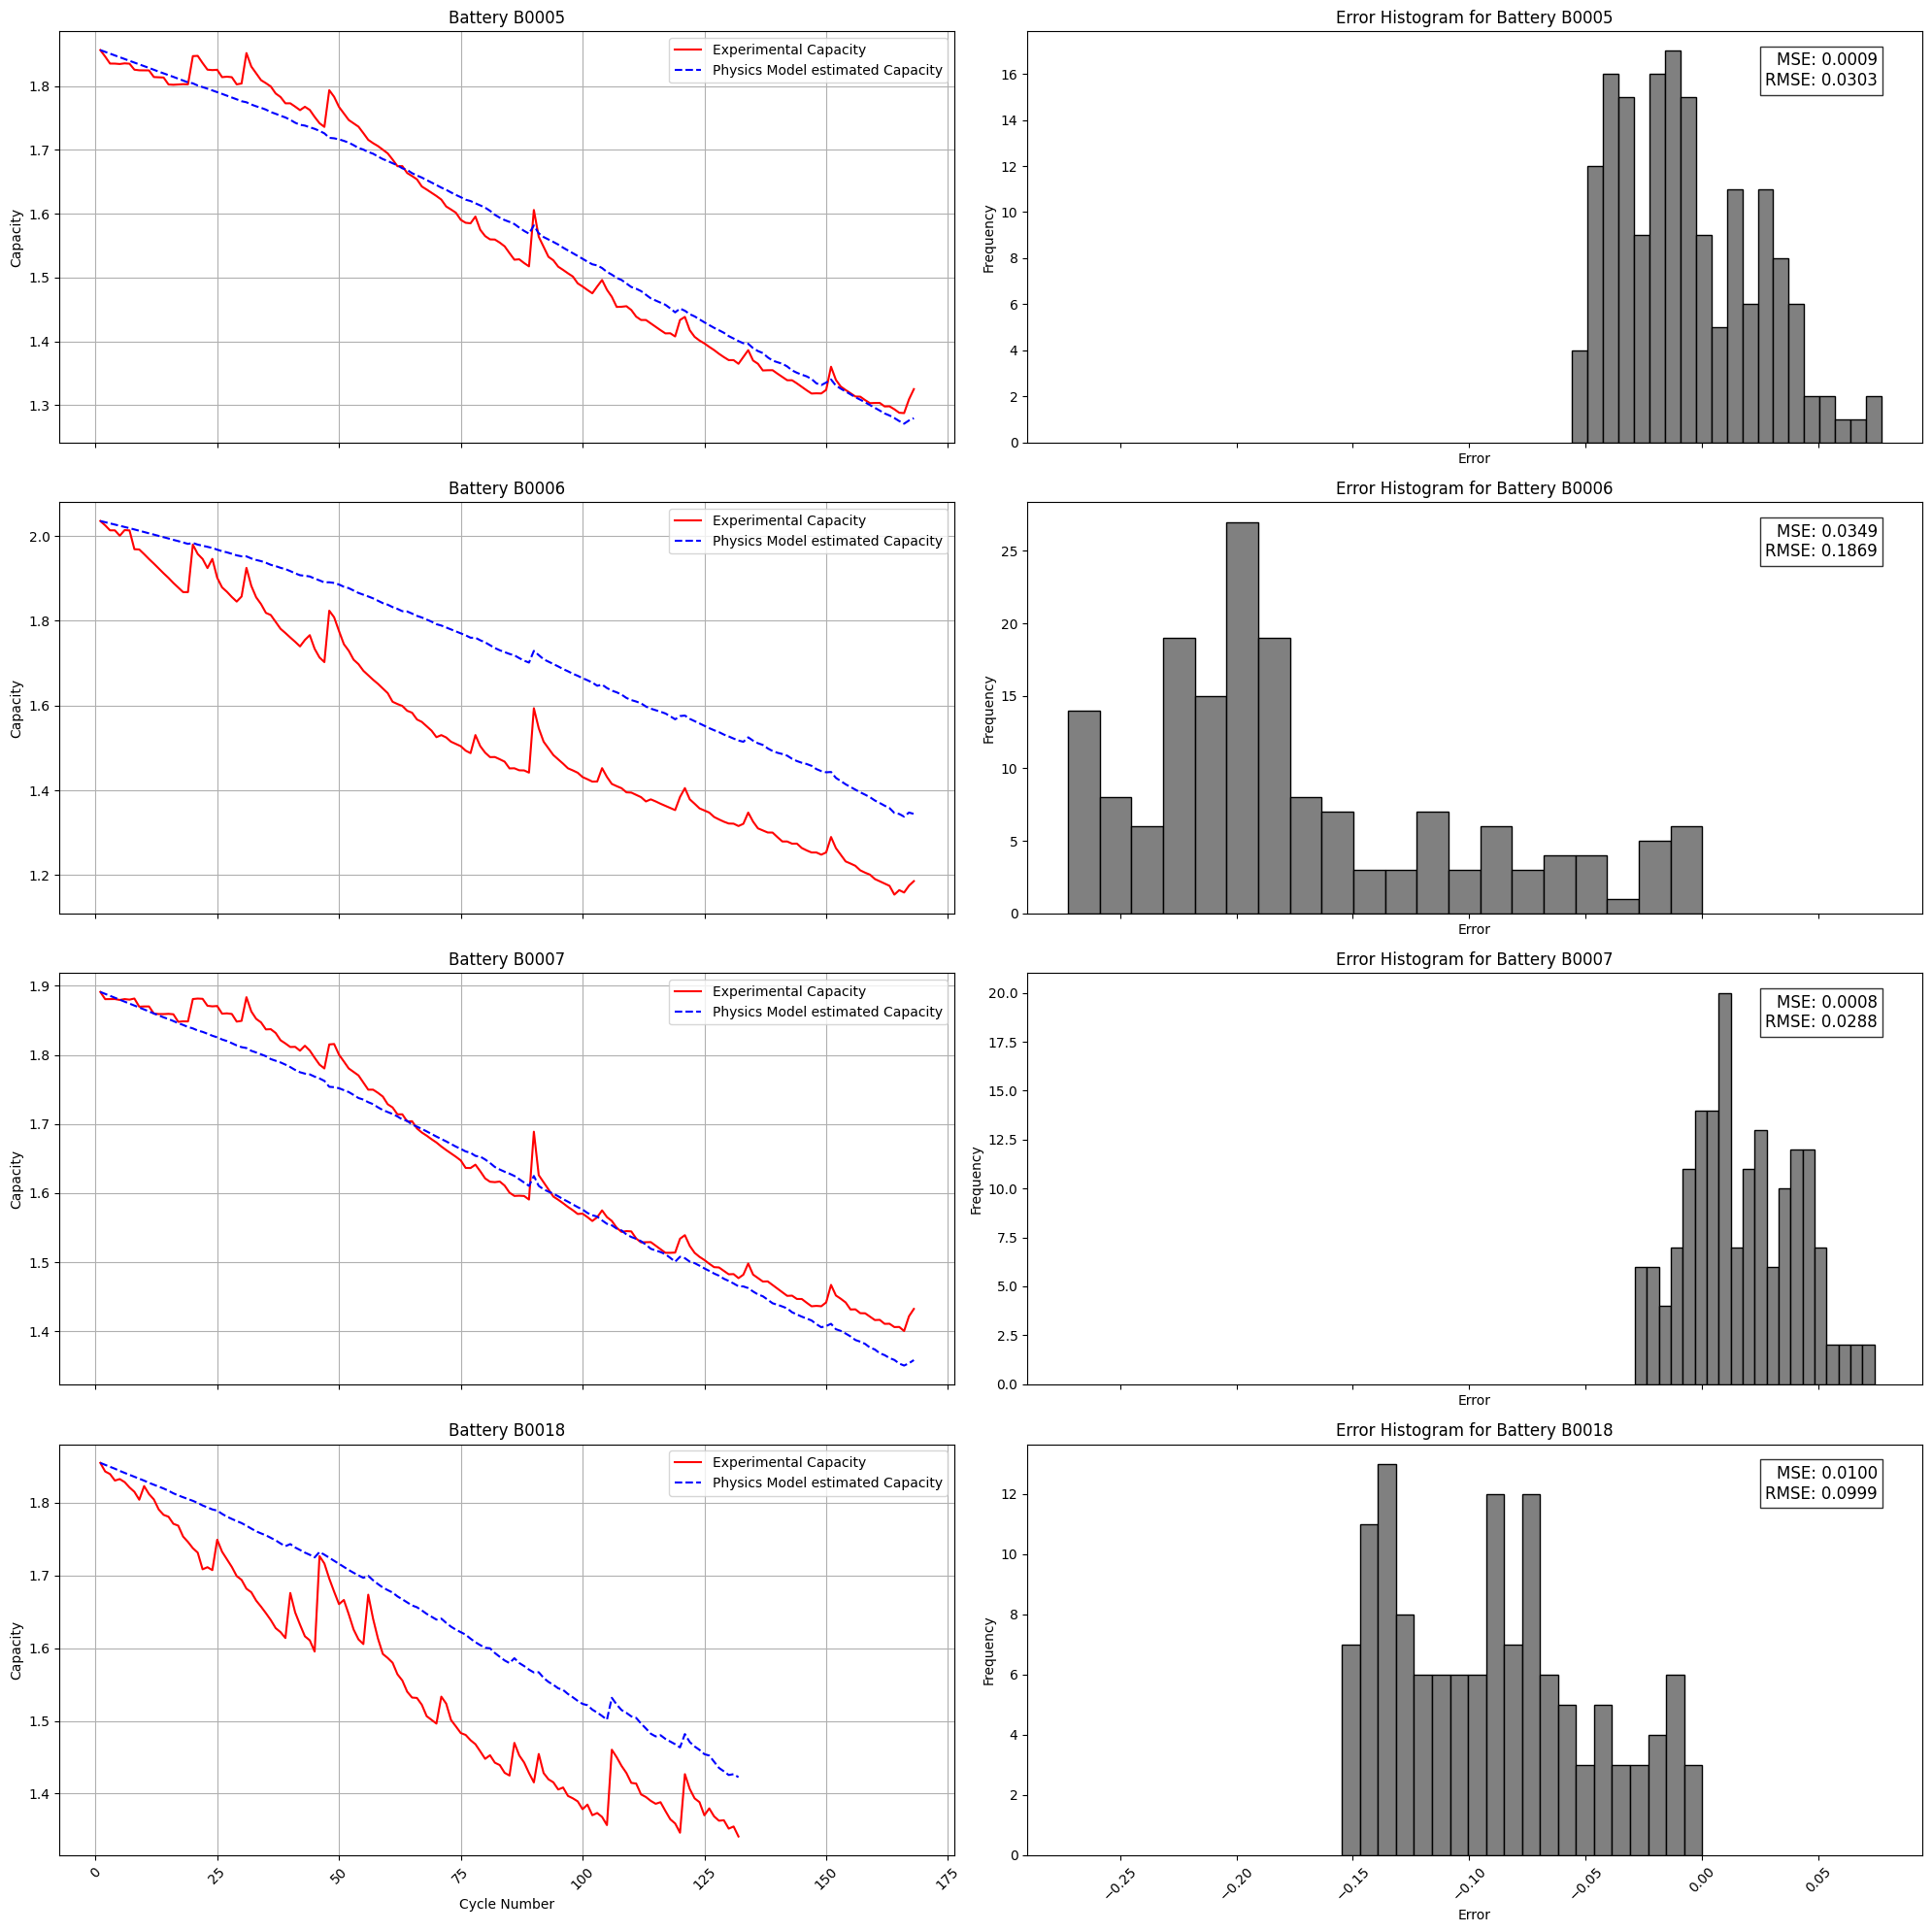

In [11]:
fig, axes = plt.subplots(len(battery_dfs), 2, figsize=(20, 5 * len(battery_dfs)), sharex='col')

for i, (battery, reorg_t_df) in enumerate(battery_dfs.items()):
    # Calculate predicted capacity
    reorg_t_df_predict = predict_capacity_physical_model(reorg_t_df, k=0.13)
    
    # Display the first few rows of the corrected dataframe
    print(f"Battery {battery} Corrected DataFrame:")
    print(reorg_t_df_predict.head())
    print("\n")
    
    # Plot experimental capacity
    axes[i, 0].plot(reorg_t_df_predict['id_cycle'], reorg_t_df_predict['Capacity'], label='Experimental Capacity', color='red')
    
    # Plot corrected capacity
    axes[i, 0].plot(reorg_t_df_predict['id_cycle'], reorg_t_df_predict['C. Capacity'], label='Physics Model estimated Capacity', color='blue', linestyle='--')
    
    axes[i, 0].set_title(f'Battery {battery}')
    axes[i, 0].set_ylabel('Capacity')
    axes[i, 0].legend()
    axes[i, 0].grid()
    
    # Rotate x-axis labels for readability
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Calculate error
    error = reorg_t_df_predict['Capacity'] - reorg_t_df_predict['C. Capacity']
    
    # Plot error histogram
    axes[i, 1].hist(error, bins=20, color='gray', edgecolor='black')
    axes[i, 1].set_title(f'Error Histogram for Battery {battery}')
    axes[i, 1].set_xlabel('Error')
    axes[i, 1].set_ylabel('Frequency')
    
    # Rotate x-axis labels for readability
    axes[i, 1].tick_params(axis='x', rotation=45)
    
    # Calculate RMSE and MSE
    mse = np.mean(error**2)
    rmse = np.sqrt(mse)
    
    # Display RMSE and MSE on the histogram
    axes[i, 1].text(0.95, 0.95, f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}', 
                    transform=axes[i, 1].transAxes, fontsize=12,
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.8))

# Set common labels
axes[-1, 0].set_xlabel('Cycle Number')

# Adjust layout
plt.tight_layout()
plt.show()

## Capacity prediciton using Neural Network 

In [12]:
battery_dfs

{'B0005':      id_cycle  Voltage_measured  Current_measured  Temperature_measured  \
 0           1          3.974871         -2.008709             38.904112   
 1           2          3.979157         -2.008829             38.934590   
 2           3          3.979995         -2.007352             38.743649   
 3           4          3.981613         -2.008008             38.672511   
 4           5          3.982253         -2.009143             38.558828   
 ..        ...               ...               ...                   ...   
 163       164          3.970419         -2.009389             40.864674   
 164       165          3.969450         -2.007246             40.857545   
 165       166          3.969489         -2.008697             40.937025   
 166       167          3.964731         -2.009055             40.936092   
 167       168          3.982260         -2.003196             40.873909   
 
      Current_charge  Voltage_charge      Time  Capacity       type  \
 0    

### Pure Emperical using neural network

There are many different kind of target that can use the technique for prediciotn. 
1. predict the capacity vs cycle behaviour of a unseen cell 
2. predict the capacity vs cycle of future cycles (more complicated, can use different kinds of time-series algorithm to do this )
3. maybe more ideas later


### 1. Predict the capacity vs cycle behaviour of a unseen cell 

In [13]:
## Train test split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Split the data into training, testing, and validation sets based on batteries
train_batteries = list(battery_dfs.keys())
validation_battery = train_batteries.pop(np.random.randint(len(train_batteries)))
print(f"Training batteries: {train_batteries}")
print(f"Validation battery: {validation_battery}")

# Combine data from training batteries
train_test_data = pd.concat([battery_dfs[battery] for battery in train_batteries if battery != validation_battery])
validation_battery_data = battery_dfs[validation_battery]

# Further split train_test_data into training and testing sets
train_data, test_data = train_test_split(train_test_data, test_size=0.2, random_state=42)

# Feature selection
X_train = train_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_train = train_data['Capacity']

X_test = test_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_test = test_data['Capacity']

X_validation = validation_battery_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_validation = validation_battery_data['Capacity']


Training batteries: ['B0005', 'B0006', 'B0018']
Validation battery: B0007


In [14]:
# TensorFlow training

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/100


c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 239.2128 - val_loss: 23.3597
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0075 - val_loss: 0.5443
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6748 - val_loss: 0.1046
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1782 - val_loss: 0.0640
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0732 - val_loss: 0.0462
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0591 - val_loss: 0.1061
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0633 - val_loss: 0.0338
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0384 - val_loss: 0.0146
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156 - val_loss: 0.0104
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077 - val_loss: 0.0036
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - va

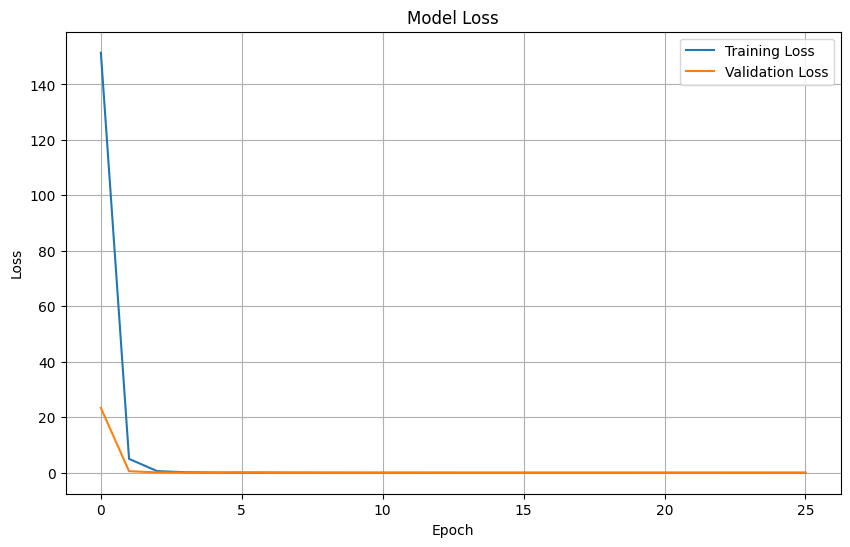

In [15]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


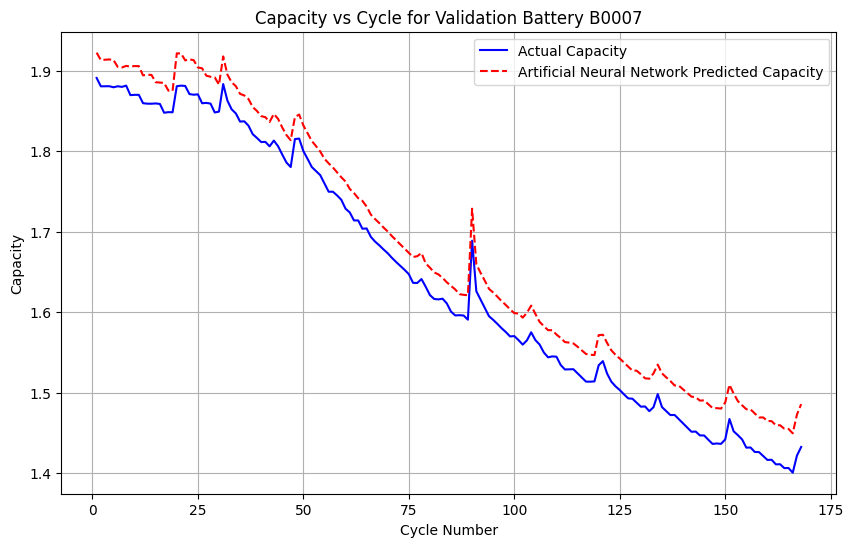

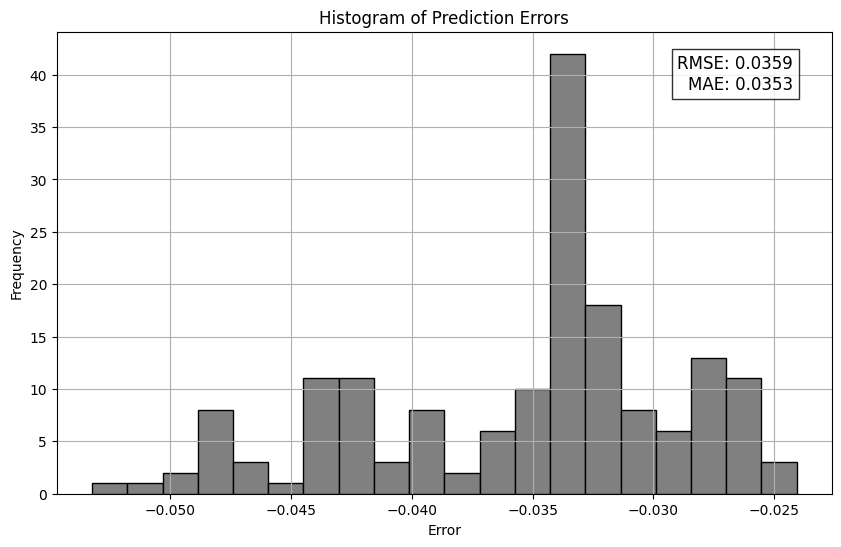

In [16]:
# Predict the capacity for the validation data
y_pred_validation = model.predict(X_validation)

# Plot the actual vs predicted capacity for the validation battery
plt.figure(figsize=(10, 6))
plt.plot(validation_battery_data['id_cycle'], y_validation, label='Actual Capacity', color='blue')
plt.plot(validation_battery_data['id_cycle'], y_pred_validation, label='Artificial Neural Network Predicted Capacity', color='red', linestyle='--')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity')
plt.title(f'Capacity vs Cycle for Validation Battery {validation_battery}')
plt.legend()
plt.grid(True)
plt.show()

# Calculate errors
errors = y_validation - y_pred_validation.flatten()

# Calculate RMSE and MAE
rmse = np.sqrt(np.mean(errors**2))
mae = np.mean(np.abs(errors))

# Plot the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='gray', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)

# Display RMSE and MAE on the plot
plt.text(0.95, 0.95, f'RMSE: {rmse:.4f}\nMAE: {mae:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

### 2. Predict future cycles

In [17]:
## Train test split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Combine data from all batteries except the validation battery
all_data = pd.concat([battery_dfs[battery] for battery in battery_dfs if battery != validation_battery])

# Calculate the split indices
train_idx = int(0.7 * len(all_data))
test_idx = int(0.9 * len(all_data))

# Split the data into training, testing, and validation sets
train_data = all_data.iloc[:train_idx]
test_data = all_data.iloc[train_idx:test_idx]
validation_data = all_data.iloc[test_idx:]

# Feature selection
X_train = train_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_train = train_data['Capacity']

X_test = test_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_test = test_data['Capacity']

X_validation = validation_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_validation = validation_data['Capacity']


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/100


c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1414.9272 - val_loss: 166.7004
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103.0533 - val_loss: 5.0837
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2973 - val_loss: 1.3543
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2624 - val_loss: 0.0363
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7485 - val_loss: 0.5564
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5702 - val_loss: 0.7242
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3165 - val_loss: 0.0405
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0573 - val_loss: 0.0186
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0259 - val_loss: 8.8381e-04
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0023
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 6.7533e-

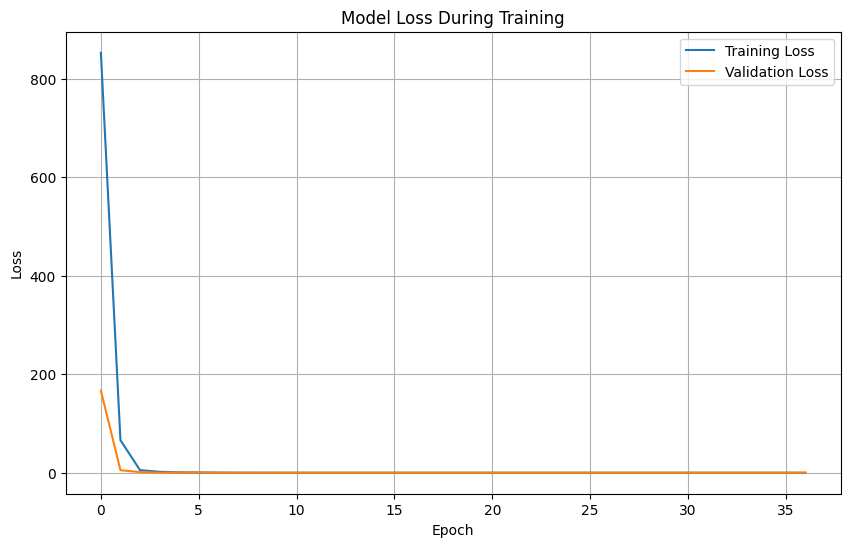

In [19]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [20]:
# Extract the validation data range from validation_battery_data
id_cycle_range = range(125, 180)
validation_data_range = validation_battery_data[validation_battery_data['id_cycle'].isin(id_cycle_range)]
X_vali_input = validation_data_range[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_pred_vali_range = model.predict(X_vali_input)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [21]:
validation_data_range

,id_cycle,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,type,ambient_temperature,time,Battery,Cumulated_time,C. Capacity
124,125,3.996953,-1.984675,40.881276,2.0,3.003,2773.078,1.503196,discharge,24,2008.0,B0007,109.279029,1.491063
125,126,3.996449,-1.984759,40.831891,2.0,3.002,2763.625,1.497822,discharge,24,2008.0,B0007,110.046703,1.487421
126,127,3.995749,-1.985137,40.807327,2.0,3.001,2754.516,1.492849,discharge,24,2008.0,B0007,110.811846,1.483596
127,128,3.994534,-1.985202,40.686641,2.0,3.001,2744.515,1.492414,discharge,24,2008.0,B0007,111.574211,1.480496
128,129,3.994824,-1.985365,40.864863,2.0,3.002,2744.875,1.487483,discharge,24,2008.0,B0007,112.336676,1.476098
129,130,3.994071,-1.983663,40.774734,2.0,3.001,2736.172,1.482535,discharge,24,2008.0,B0007,113.096724,1.472888
130,131,3.993593,-1.985481,40.721663,2.0,3.004,2726.594,1.482787,discharge,24,2008.0,B0007,113.854111,1.469221
131,132,3.993535,-1.982617,40.845406,2.0,2.999,2725.953,1.476971,discharge,24,2008.0,B0007,114.611321,1.465150
132,133,3.988232,-1.981952,40.696171,2.0,3.004,2735.391,1.481902,discharge,24,2008.0,B0007,115.371151,1.464968
133,134,3.999583,-1.985130,40.932745,2.0,3.014,2754.453,1.498137,discharge,24,2008.0,B0007,116.136277,1.462569


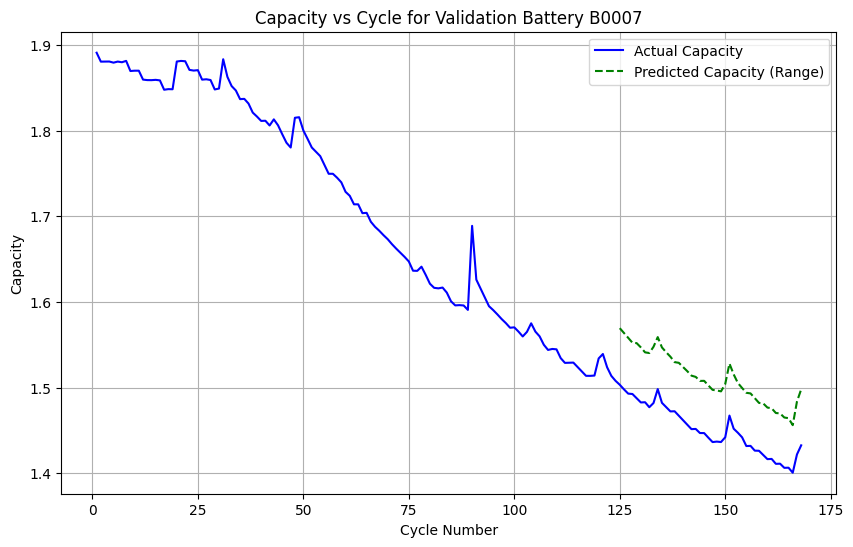

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(validation_battery_data['id_cycle'], validation_battery_data['Capacity'], label='Actual Capacity', color='blue')
plt.plot(validation_data_range['id_cycle'], y_pred_vali_range, label='Predicted Capacity (Range)', color='green', linestyle='--')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity')
plt.title(f'Capacity vs Cycle for Validation Battery {validation_battery}')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


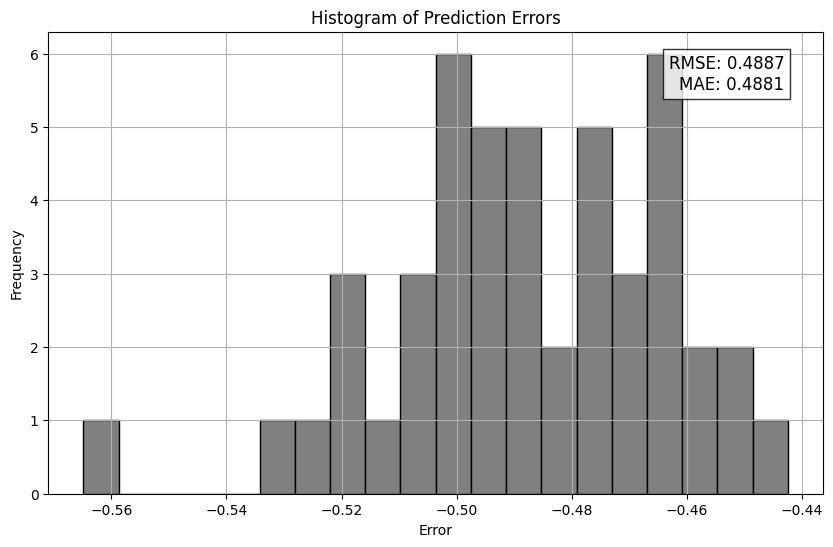

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ensure y_validation and y_pred_validation have the same shape
y_pred_validation = y_pred_validation.flatten()[:len(y_validation)]

# Calculate errors
errors = y_validation - y_pred_validation

# Calculate RMSE and MAE using sklearn
rmse = mean_squared_error(y_validation, y_pred_validation, squared=False)
mae = mean_absolute_error(y_validation, y_pred_validation)

# Plot the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='gray', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)

# Display RMSE and MAE on the plot
plt.text(0.95, 0.95, f'RMSE: {rmse:.4f}\nMAE: {mae:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()